### Use deep learning with sentiment_analysis

#### Use data set

In [310]:
import pandas as pd
import numpy as np

data_ = pd.read_csv('text_emotion.csv')

In [2]:
data_.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = data_.content

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
targets = encoder.fit_transform(data_.sentiment)
print(targets)

[ 2 10 10 ...  7  5  7]


In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=0)

print("x_train :", np.size(x_train))
print("x_test :", np.size(x_test))
print("ratio :", round(np.size(x_test)/(np.size(x_train)+np.size(x_test))*100))

x_train : 379822
x_test : 96124
ratio : 20


In [6]:
from keras.backend import clear_session
clear_session()

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

input_dim = x_train.shape[1]  # Number of features

model = keras.Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4821300   
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1313      
Total params: 4,822,613
Trainable params: 4,822,613
Non-trainable params: 0
_________________________________________________________________


In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(x_train))
print(type(y_train))

(32000, 48212)
(8000, 48212)
(32000,)
(8000,)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [10]:
# reording the sparse matrice indices
x_test = x_test.sorted_indices()
x_train = x_train.sorted_indices()

In [11]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    batch_size=1000)

Epoch 1/10
32/32 [==============================] - 13s 287ms/step - loss: 2.4606 - acc: 0.2013 - val_loss: 2.1906 - val_acc: 0.2665
Epoch 2/10
32/32 [==============================] - 5s 155ms/step - loss: 2.0899 - acc: 0.3581 - val_loss: 2.0600 - val_acc: 0.3340
Epoch 3/10
32/32 [==============================] - 5s 156ms/step - loss: 1.8613 - acc: 0.4695 - val_loss: 1.9769 - val_acc: 0.3524
Epoch 4/10
32/32 [==============================] - 5s 160ms/step - loss: 1.6248 - acc: 0.5352 - val_loss: 1.9368 - val_acc: 0.3537
Epoch 5/10
32/32 [==============================] - 5s 157ms/step - loss: 1.3826 - acc: 0.6062 - val_loss: 1.9339 - val_acc: 0.3589
Epoch 6/10
32/32 [==============================] - 5s 152ms/step - loss: 1.1728 - acc: 0.6817 - val_loss: 1.9529 - val_acc: 0.3539
Epoch 7/10
32/32 [==============================] - 5s 150ms/step - loss: 0.9778 - acc: 0.7453 - val_loss: 1.9923 - val_acc: 0.3486
Epoch 8/10
32/32 [==============================] - 5s 160ms/step - loss: 0

In [12]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [13]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8822
Testing Accuracy:  0.3276


In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

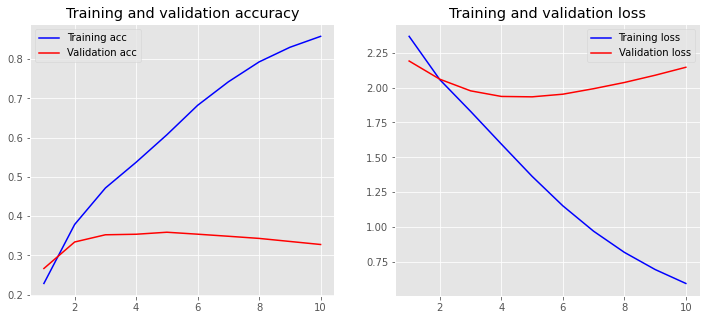

In [15]:
plot_history(history)

### Use word embeding 

In [214]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = data_.content

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
targets = encoder.fit_transform(data_.sentiment)
print(targets)

[ 2 10 10 ...  7  5  7]


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse=False)
print(targets.shape)
targets = targets.reshape((40000, 1))
encoder_.fit_transform(targets)

(40000,)


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(corpus, targets, test_size=0.2, random_state=0)

In [183]:
 from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = max(data_.content.apply(str.split).apply(len))

print(x_train[2])
print(X_train[2])

<class 'pandas.core.series.Series'>
Funeral ceremony...gloomy friday...
[195, 351, 1637, 1229, 1, 99, 2, 203, 4, 141, 2, 33, 93, 445, 1, 65, 15, 394]


In [49]:
dict_inv = dict((v, k) for k, v in tokenizer.word_index.items())
x_decoded = [dict_inv[v] for v in dict_inv]
print(x_decoded)

['i', 'to', 'the', 'a', 'my', 'and', 'you', 'it', 'is', 'in', 'for', 'of', 'on', 'me', 'have', 'so', 'that', 'but', 'just', "i'm", 'day', 'with', 'be', 'at', 'not', 'was', 'all', 'good', 'now', 'this', 'out', 'up', 'get', 'like', 'no', 'are', 'go', 'http', 'quot', "it's", 'do', 'work', 'your', 'got', 'today', 'love', 'too', 'going', 'happy', 'from', 'one', 'lol', 'u', 'com', 'back', 'know', 'time', 'what', 'im', 'will', 'we', 'am', 'really', 'about', "don't", 'its', 'see', 'amp', 'had', "can't", 'there', 'some', 'can', 'night', 'home', 'new', 'if', 'think', 'thanks', 'well', 'how', 'want', '2', 'when', 'as', 'oh', 'still', 'they', 'off', 'an', 'much', 'here', 'more', 'miss', 'last', 'hope', 'great', 'morning', 'need', 'been', 'has', 'her', 'haha', 'twitter', 'then', 'feel', 'or', 'fun', '3', 'again', 'only', 'he', 'sad', 'sorry', 'bad', 'would', 'why', 'tomorrow', 'wish', 'tonight', "i'll", 'very', 'by', 'though', 'right', 'make', 'did', 'better', 'them', 'gonna', 'nice', 'she', "that'

In [50]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'and': 6, 'you': 7, 'it': 8, 'is': 9, 'in': 10, 'for': 11, 'of': 12, 'on': 13, 'me': 14, 'have': 15, 'so': 16, 'that': 17, 'but': 18, 'just': 19, "i'm": 20, 'day': 21, 'with': 22, 'be': 23, 'at': 24, 'not': 25, 'was': 26, 'all': 27, 'good': 28, 'now': 29, 'this': 30, 'out': 31, 'up': 32, 'get': 33, 'like': 34, 'no': 35, 'are': 36, 'go': 37, 'http': 38, 'quot': 39, "it's": 40, 'do': 41, 'work': 42, 'your': 43, 'got': 44, 'today': 45, 'love': 46, 'too': 47, 'going': 48, 'happy': 49, 'from': 50, 'one': 51, 'lol': 52, 'u': 53, 'com': 54, 'back': 55, 'know': 56, 'time': 57, 'what': 58, 'im': 59, 'will': 60, 'we': 61, 'am': 62, 'really': 63, 'about': 64, "don't": 65, 'its': 66, 'see': 67, 'amp': 68, 'had': 69, "can't": 70, 'there': 71, 'some': 72, 'can': 73, 'night': 74, 'home': 75, 'new': 76, 'if': 77, 'think': 78, 'thanks': 79, 'well': 80, 'how': 81, 'want': 82, '2': 83, 'when': 84, 'as': 85, 'oh': 86, 'still': 87, 'they': 88, 'off': 89, 'an': 9

In [20]:
for word in ['the', 'all', 'happy', 'sad']:
     print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 3
all: 27
happy: 49
sad: 113


In [68]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[4544  297   40    4   52   81   36    7   45    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [149]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           2092350   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               500100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1313      
Total params: 2,593,763
Trainable params: 2,593,763
Non-trainable params: 0
_________________________________________________________________


In [150]:
from keras.backend import clear_session
clear_session()

In [151]:
history_ = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=1000)

Epoch 1/20
32/32 [==============================] - 15s 417ms/step - loss: 2.3279 - acc: 0.1925 - val_loss: 2.1410 - val_acc: 0.2531
Epoch 2/20
32/32 [==============================] - 14s 431ms/step - loss: 2.1881 - acc: 0.2343 - val_loss: 2.1032 - val_acc: 0.2620
Epoch 3/20
32/32 [==============================] - 13s 401ms/step - loss: 2.1315 - acc: 0.2681 - val_loss: 2.0565 - val_acc: 0.2955
Epoch 4/20
32/32 [==============================] - 12s 372ms/step - loss: 2.0639 - acc: 0.2974 - val_loss: 1.9927 - val_acc: 0.3199
Epoch 5/20
32/32 [==============================] - 9s 275ms/step - loss: 1.9796 - acc: 0.3354 - val_loss: 1.9548 - val_acc: 0.3341
Epoch 6/20
32/32 [==============================] - 13s 396ms/step - loss: 1.9110 - acc: 0.3577 - val_loss: 1.9347 - val_acc: 0.3410
Epoch 7/20
32/32 [==============================] - 13s 407ms/step - loss: 1.8619 - acc: 0.3761 - val_loss: 1.9321 - val_acc: 0.3394
Epoch 8/20
32/32 [==============================] - 15s 458ms/step - l

### Get embeding layers with word

In [25]:
13H30emebedding_layer = model.layers[0]
# if you have access to the embedding layer explicitly
embeddings = emebedding_layer.get_weights()[0]

# or access the embedding layer through the constructed model 
# first `0` refers to the position of embedding layer in the `model`
embeddings = model.layers[0].get_weights()[0]

# `embeddings` has a shape of (num_vocab, embedding_dim) 

# `word_to_index` is a mapping (i.e. dict) from words to their index, e.g. `love`: 69
words_embeddings = {w:embeddings[idx] for w, idx in tokenizer.word_index.items()}

# now you can use it like this for example
print(words_embeddings['love']) 

[ 0.13618438 -0.07363715  0.03620458  0.0669797  -0.13578865 -0.20504275
 -0.29170018 -0.07275324 -0.21319976 -0.33175257  0.05338139 -0.2171669
  0.25930327  0.11374221 -0.11573514 -0.13628644  0.06077831 -0.06843106
  0.17337883 -0.10283764 -0.16572534 -0.11052479 -0.12826757  0.22370258
  0.00492077 -0.18850856  0.20394449 -0.04719213 -0.29618612  0.26336935
  0.18828304 -0.24460974  0.09474485 -0.18607284  0.18950145  0.12152594
 -0.21588235  0.1705443  -0.2517301  -0.0968075   0.24663654 -0.24135259
  0.19748761 -0.27723062  0.06687298 -0.16936691  0.20579119 -0.29323715
  0.23207483 -0.2883526 ]


In [75]:
history_.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [152]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8095
Testing Accuracy:  0.2935


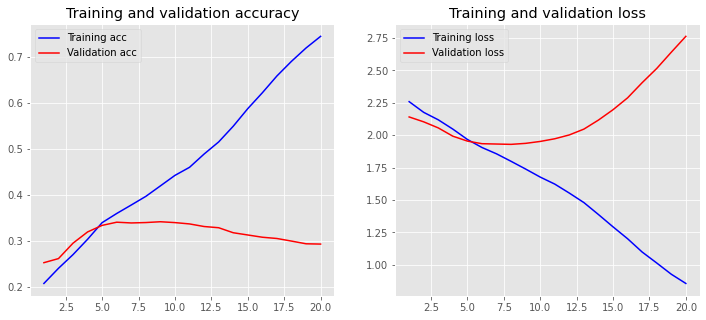

In [153]:
plot_history(history_)

### Fonction classification repport 

In [29]:
from keras.backend import clear_session
clear_session()

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from time import time


def classification_report(model):
    start = time()
    history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
    
    loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=False)
        #print("Training Accuracy: {:.4f}".format(accuracy))
    loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=False)
    y_pred1 = model.predict(X_test)
    y_pred = np.argmax(y_pred1, axis=1)

    # Print f1, precision, and recall scores
    precision = precision_score(y_test, y_pred , average="macro")
    recall = recall_score(y_test, y_pred , average="macro")
    res = [accuracy_train, accuracy_test, precision, recall]#, f1_score]
    df = pd.DataFrame([res], index = ['metrics'], columns=['accuracy_train', 'accuracy_test', 'precision', 'recall'])#
    #print(df)
    f1_score_classes = f1_score(y_test, y_pred , average=None)#"macro"))
    #print(f1_score)
    df2 = pd.DataFrame([f1_score_classes], index = ['metrics'], columns=['f1_happiness','f1_sadness','f1_anger','f1_worry','f1_love'
                                                                         ,'f1_surprise','f1_fun','f1_relief','f1_empty','f1_enthusiasm'
                                                                         ,'f1_boredom','f1_hate','f1_neutral'])
    DF = pd.concat([df,df2])
    end = time()
    Time = end - start
    return "Time = {} secondes".format(Time), DF

In [31]:
classification_report(model)

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Time = 161.7093596458435 secondes',
          accuracy_train  accuracy_test  precision   recall  f1_happiness  \
 metrics        0.846625        0.28825   0.158138  0.15686           NaN   
 metrics             NaN            NaN        NaN      NaN           0.0   
 
          f1_sadness  f1_anger  f1_worry   f1_love  f1_surprise    f1_fun  \
 metrics         NaN       NaN       NaN       NaN          NaN       NaN   
 metrics         0.0       0.0       0.0  0.093851      0.27933  0.163855   
 
          f1_relief  f1_empty  f1_enthusiasm  f1_boredom   f1_hate  f1_neutral  
 metrics        NaN       NaN            NaN         NaN       NaN         NaN  
 metrics   0.374248   0.37153       0.081023    0.242796  0.080668    0.332255  )

### Predict the model 

In [156]:
from sklearn.metrics import classification_report
#print([X_test[0]])

test = np.array(X_test)
y_pred = model.predict(test, verbose = 1)
#print(y_pred.shape)
#print(y_test.shape)

print(classification_report(y_test, y_pred.argmax(1)))


250/250 [==============================] - 5s 20ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00       147
           3       0.00      0.00      0.00       147
           4       0.10      0.05      0.06       354
           5       0.29      0.32      0.31      1052
           6       0.21      0.13      0.16       251
           7       0.37      0.36      0.36       780
           8       0.34      0.43      0.38      1743
           9       0.12      0.03      0.05       292
          10       0.24      0.28      0.26      1062
          11       0.09      0.06      0.07       422
          12       0.31      0.35      0.33      1694

    accuracy                           0.29      8000
   macro avg       0.16      0.16      0.15      8000
weighted avg       0.27      0.29      0.28      8000



/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [292]:
def prediction(text):
    '''fonction with predict any sentences'''
    test = tokenizer.texts_to_sequences(text)
    
    test = pad_sequences(test, padding='post', maxlen=maxlen)
    
    y_pred = model.predict(test)

    emotion = np.argmax(y_pred[0])
    inv = encoder.inverse_transform(targets)
    
    #emotions = ['bordom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry', 'anger']
    emotion_ = inv[emotion]
    return emotion_

In [293]:
prediction(["I'am very happy"])

'sadness'

In [294]:
prediction(['how are you today'])

'sadness'

## Use Pretrained Word Embeddings
### Use GloVe of groupe Stanford NLP

In [32]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [33]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(

    'glove.6B.50d.txt',

    tokenizer.word_index, embedding_dim)

In [34]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.4810619638205845

### Use GlobalMaxPool1Dcalque

In [35]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           2092350   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1313      
Total params: 2,098,763
Trainable params: 6,413
Non-trainable params: 2,092,350
_________________________________________________________________


Training Accuracy: 0.2948
Testing Accuracy:  0.2952


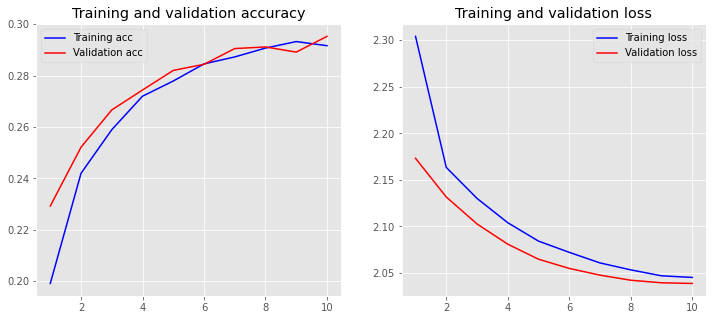

In [36]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Use trainable=True

In [37]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           2092350   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 13)                1313      
Total params: 2,098,763
Trainable params: 2,098,763
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.3563
Testing Accuracy:  0.3316


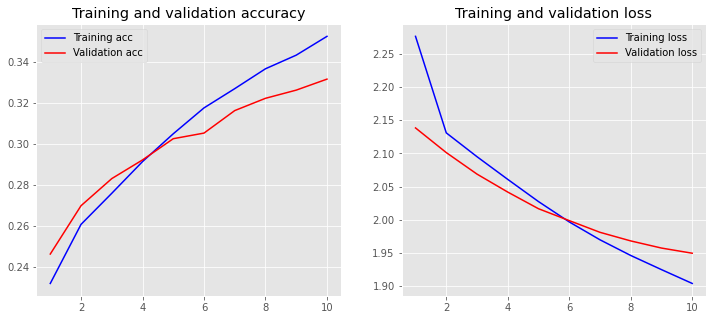

In [38]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Use neural network (CNN) (Convolutional Neural Networks)

In [39]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          4184700   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                26        
Total params: 4,248,983
Trainable params: 4,248,983
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Epoch 1/10
32/32 [==============================] - 175s 5s/step - loss: 2.5588 - acc: 0.1830 - val_loss: 2.5396 - val_acc: 0.1328
Epoch 2/10
32/32 [==============================] - 153s 5s/step - loss: 2.5344 - acc: 0.1629 - val_loss: 2.5157 - val_acc: 0.2118
Epoch 3/10
32/32 [==============================] - 151s 5s/step - loss: 2.5115 - acc: 0.2092 - val_loss: 2.4932 - val_acc: 0.2118
Epoch 4/10
32/32 [==============================] - 137s 4s/step - loss: 2.4896 - acc: 0.2097 - val_loss: 2.4719 - val_acc: 0.2118
Epoch 5/10
32/32 [==============================] - 143s 4s/step - loss: 2.4699 - acc: 0.2100 - val_loss: 2.4519 - val_acc: 0.2118
Epoch 6/10
32/32 [==============================] - 136s 4s/step - loss: 2.4505 - acc: 0.2102 - val_loss: 2.4331 - val_acc: 0.2118
Epoch 7/10
32/32 [==============================] - 140s 4s/step - loss: 2.4329 - acc: 0.2122 - val_loss: 2.4153 - val_acc: 0.2118
Epoch 8/10
25/32 [======================>.......] - ETA: 33s - loss: 2.4155 - acc: 

### Optimisation of hyperparametres

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(13, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

epochs = 10

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=1000,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)